<a href="https://colab.research.google.com/github/Freakboy123/ASL-words-translator/blob/main/data_augmentation/media_pipe_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import sin, cos

Mounted at /content/drive


In [ ]:
# Get all labels
names = []
for dir in os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels"):
    if dir !=  '.DS_Store':
        names.append(dir)
names

['research',
 'hear',
 'music',
 'brother',
 'ocean',
 'many',
 'i love you',
 'dog',
 'polite',
 'milk',
 'bookstore',
 'doctor',
 'i',
 'classroom',
 'focus',
 'money',
 'coffee',
 'book',
 'phone',
 'chicken',
 'photographer',
 'hamburger',
 'good morning',
 'open',
 'door']

In [ ]:
test_arr = np.array([[1,2,3,4],[5,6,7,8]], dtype=np.float32)
# test_arr[:,:2]
origin = np.mean(test_arr[:,:2], axis=0)
test_arr[:,:2] -= origin
origin, test_arr

(array([3., 4.], dtype=float32),
 array([[-2., -2.,  3.,  4.],
        [ 2.,  2.,  7.,  8.]], dtype=float32))

In [ ]:
test_arr[:,2] = 1
test_arr

array([[-2., -2.,  1.,  4.],
       [ 2.,  2.,  1.,  8.]], dtype=float32)

In [ ]:
test_arr[:, 1]

array([-2.,  2.], dtype=float32)

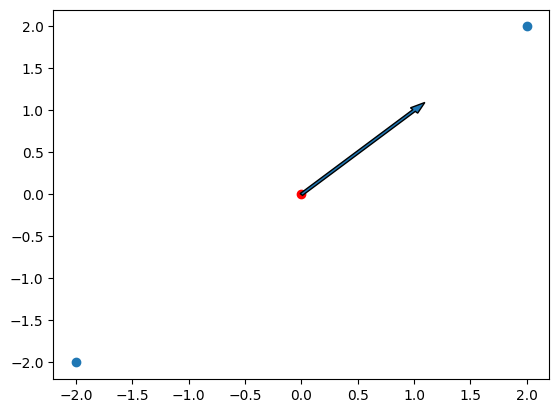

In [ ]:
plt.scatter(test_arr[:,0], test_arr[:, 1])
plt.scatter(0, 0, c="red")
plt.arrow(0,0,1,1, width=0.03)
plt.show()

In [ ]:
df = pd.read_csv("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/demo.csv")
df

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
0,0.481783,0.263291,-0.251268,0.997624,0.480460,0.229660,-0.217402,0.996738,0.482711,0.231598,...,0.026680,0.0,0.758639,0.786082,0.021126,0.0,0.759593,0.798603,0.017296,0.0
1,0.481630,0.262819,-0.284726,0.997663,0.480498,0.228990,-0.248803,0.996778,0.482889,0.231058,...,0.023139,0.0,0.762222,0.792105,0.017242,0.0,0.762655,0.803301,0.012939,0.0
2,0.481624,0.262759,-0.297694,0.997736,0.480709,0.228824,-0.262779,0.996833,0.483267,0.230927,...,0.022072,0.0,0.767398,0.792813,0.015944,0.0,0.769933,0.805204,0.011419,0.0
3,0.481631,0.262273,-0.336054,0.997899,0.480730,0.228454,-0.301580,0.997060,0.483295,0.230480,...,0.023919,0.0,0.765285,0.792616,0.018403,0.0,0.767586,0.805106,0.014234,0.0
4,0.481666,0.262271,-0.313654,0.998036,0.480804,0.228475,-0.279114,0.997251,0.483347,0.230481,...,0.020449,0.0,0.767699,0.786754,0.014595,0.0,0.768883,0.800170,0.010294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.478060,0.265460,-0.202545,0.999748,0.476053,0.231684,-0.169041,0.999652,0.478467,0.232754,...,0.007984,0.0,0.782588,0.741258,0.000239,0.0,0.782818,0.760302,-0.004702,0.0
70,0.478110,0.266470,-0.194980,0.999749,0.476170,0.232698,-0.159386,0.999653,0.478609,0.233749,...,0.011121,0.0,0.781909,0.746467,0.004765,0.0,0.782318,0.764514,0.000574,0.0
71,0.478078,0.267380,-0.193164,0.999755,0.476191,0.233562,-0.158247,0.999660,0.478656,0.234627,...,0.006822,0.0,0.794213,0.731202,0.002150,0.0,0.796758,0.750495,-0.000858,0.0
72,0.478067,0.267776,-0.195722,0.999757,0.476218,0.234010,-0.160146,0.999661,0.478696,0.235053,...,0.002802,0.0,0.798200,0.729334,-0.003268,0.0,0.803871,0.750718,-0.007041,0.0


In [ ]:
#test

frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))
frame[0]
# new_frame = rotate(frame, 5)
# print(new_frame[0])
# print(frame[0])

array([ 0.481783  ,  0.26329112, -0.25126788,  0.99762374])

In [ ]:
df.to_numpy().shape

(74, 300)

In [ ]:
all_frames = df.to_numpy().reshape((74, 75, 4))
all_frames[0][0]
all_frames.shape

(74, 75, 4)

In [ ]:
def change_origin(frame):
  new_origin = np.mean(frame[:,:2], axis=0)
  # print(new_origin.shape)
  new_frame = np.copy(frame)
  new_frame[:,:2] -= new_origin
  return frame, new_frame 

In [ ]:
def visualize_rotation(func):

  def wrap(*args, **kwargs):
    original_frame, new_frame = func(*args, **kwargs)
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()
    return original_frame, new_frame

  return wrap

In [ ]:
def visualize(frame):
    coordsX = []
    coordsY = []
    for i in range(frame.shape[0]):
        coordsX.append((frame[i][0]))
        coordsY.append((frame[i][1]))
    plt.scatter(coordsX, coordsY)


In [ ]:
@visualize_rotation
def rotate(frame, angle, origin=[0, 0]):
    normalized_frame = change_origin(frame)
    angle_rad = math.radians(angle)
    new_frame = np.copy(frame)
    rotation_matrix = np.array([[cos(angle_rad), -sin(angle_rad)], [sin(angle_rad), cos(angle_rad)]])
    for i in range(len(new_frame)):
        new_frame[i][:2] = np.matmul(rotation_matrix, new_frame[i][:2])
    return frame, new_frame

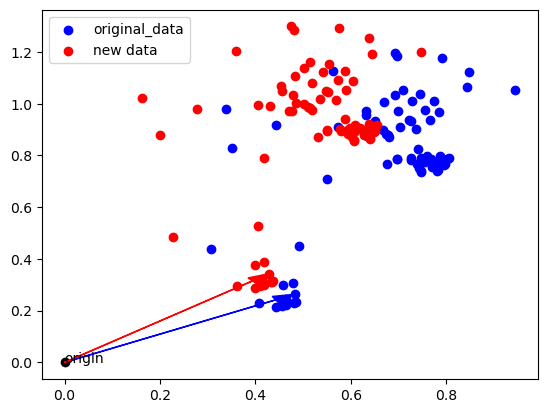

In [ ]:
#rotation without changing origin
_, f1 = rotate(all_frames[0], 10)

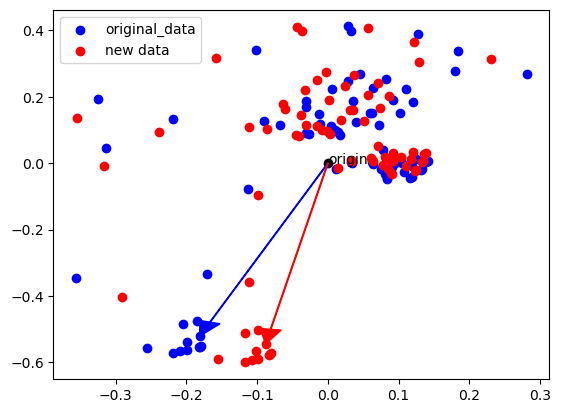

In [ ]:
_, frame = change_origin(all_frames[0])
_, _=rotate(frame, 10)

In [118]:
class VectorTransformation():

  def __init__(self, center_data=True, translation_x=0, translation_y=0, rotation_angle=0, 
               shear_x=0, shear_y=0, scaling_x=1, scaling_y=1, reflection=True, random=False):
    self.__random = random
    self.center = center_data
    self.reflect = reflection

    if not(random):
      self.tx = translation_x
      self.ty = translation_y
      self.angle = math.radians(rotation_angle)
      self.shx = shear_x
      self.shy = shear_y
      self.scale_x = scaling_x
      self.scale_y = scaling_y
    else:
      self.tx = random.uniform(0, translation_x)
      self.ty = random.uniform(0, translation_y)
      self.angle =random.uniform(0, math.radians(rotation_angle))
      self.shx = random.uniform(0, shear_x)
      self.shy = random.uniform(0, shear_y)
      self.scale_x = random.uniform(1, scaling_x)
      self.scale_y = random.uniform(1, scaling_y)

  def translation_matrix(self):
    return np.array([[1, 0, self.tx],
                    [0, 1, self.ty],
                    [0, 0, 1]])

  def rotation_matrix(self):
    return np.array([[cos(self.angle), -sin(self.angle), 0], 
                       [sin(self.angle), cos(self.angle), 0],
                       [0, 0, 1]])

  def shearx_matrix(self, sign=0):
    return np.array([[1, ((-1)**sign)*self.shx, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def sheary_matrix(self, sign=0):
    return np.array([[1, 0, 0],
                     [((-1)**sign)*self.shy, 1, 0],
                     [0, 0, 1]])
    
  def scaling_matrix(self):
    return np.array([[self.scale_x, 0, 0],
                     [0, self.scale_y, 0], 
                     [0, 0, 1]])
    
  def reflection_matrix(self):
    return np.array([[(-1)**(int(self.reflect)), 0, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def change_origin(self, frame):
    new_origin = np.mean(frame[:,:2], axis=0)
    new_frame = np.copy(frame)
    new_frame[:,:2] -= new_origin
    return new_frame 

In [47]:
def add_to_class(Class):  
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [119]:
@add_to_class(VectorTransformation)
def transform(self, frame, change_shear_direction=False):
    new_frame = np.copy(frame)
    # new_frame = np.reshape((1, 3))
    new_frame[:, 2] = 1

    if self.center:
            new_frame = self.change_origin(new_frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        # print(new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.translation_matrix(), new_frame[i][:3])
        if change_shear_direction:
          new_frame[i][:3] = np.matmul(self.shearx_matrix(int(new_frame[i][0]*new_frame[i][1]<0)), new_frame[i][:3])
          # print("shear x:", self.shearx_matrix(int(new_frame[i][0]*new_frame[i][1]<0)))
          # print("sign: ", int(new_frame[i][0]*new_frame[i][1]<0))
          new_frame[i][:3] = np.matmul(self.sheary_matrix(int(new_frame[i][0]*new_frame[i][1]<0)), new_frame[i][:3])
        else:
          new_frame[i][:3] = np.matmul(self.shearx_matrix(), new_frame[i][:3])
          # print("shear x:", self.shearx_matrix())
          new_frame[i][:3] = np.matmul(self.sheary_matrix(), new_frame[i][:3])

        # print(new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame


In [122]:
@add_to_class(VectorTransformation)
def visualize_change(self, original_frame, new_frame, plot=False):
    if plot:
      plt.plot(original_frame[:, 0], original_frame[:, 1], c="blue")
      plt.plot(new_frame[:, 0], new_frame[:, 1], c="red")
    plt.title(f"translation: ({self.tx}, {self.ty})\nrotation: {self.angle},\n shear: ({self.shx}, {self.shy})\n scaling: ({self.scale_x}, {self.scale_y})")
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.axhline(y=0, color="black")
    plt.axvline(x=0, color="black")
    plt.legend()
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([min(np.amin(original_frame[:, 0]), np.amin(new_frame[:, 0]))-1, max(np.amax(original_frame[:, 0]), np.amax(new_frame[:, 0]))+1])
    plt.ylim([min(np.amin(original_frame[:, 1]), np.amin(new_frame[:, 1]))-1, max(np.amax(original_frame[:, 1]), np.amax(new_frame[:, 1]))+1])

In [6]:
data_aug = VectorTransformation(shear_x=0.2, reflection=False, center_data=True)
new_frame = data_aug.transform(all_frames[0])
# new_frame

AttributeError: ignored

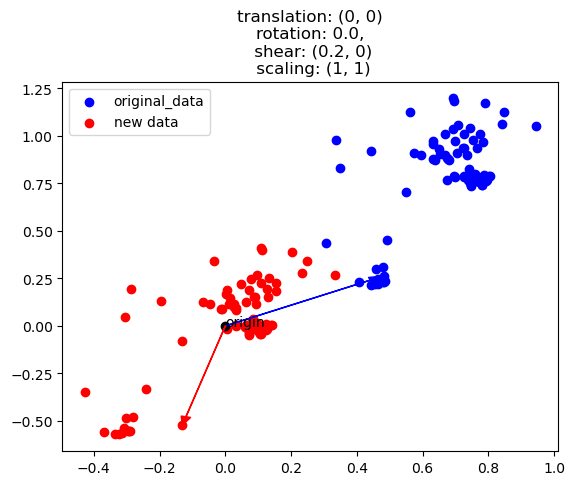

In [ ]:
_, frame = change_origin(new_frame)
data_aug.visualize_change(all_frames[0], frame)

##random funcitons


In [ ]:
import random 

@add_to_class(VectorTransformation)
def random_translation_matrix(self):
    return np.array([[1, 0, random.uniform(0, self.tx)],
                         [0, 1, self.ty],
                         [0, 0, 1]])

@add_to_class(VectorTransformation)
def random_rotation_matrix(self):
    return np.array([[cos(random.uniform(0, self.angle)), -sin(random.uniform(0,self.angle)), 0], 
                    [sin(random.uniform(0, self.angle)), cos(random.uniform(0, self.angle)), 0],
                    [0, 0, 1]])
  
@add_to_class(VectorTransformation)
def random_shearx_matrix(self):
    return np.array([[1, random.uniform(0, self.shx), 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_sheary_matrix(self):
  return np.array([[1, 0, 0],
                  [random.uniform(0, self.shy), 1, 0],
                  [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_scaling_matrix(self):
  return np.array([[random.uniform(1, self.scale_x), 0, 0],
                  [0, random.uniform(1, self.scale_y), 0], 
                  [0, 0, 1]])

In [ ]:
@add_to_class(VectorTransformation)
def random_transform(self, frame):
    new_frame = np.copy(frame[:, :2])
    # new_frame = new_frame.reshape((1, 3))
    new_frame[:, 2] = 1

    #centering
    if self.center:
      new_frame = self.change_origin(frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_translation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_shearx_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_sheary_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame

In [ ]:
@add_to_class(VectorTransformation)
def get_new_data(self, frames: list[[]], ratio, random=True):
  new_data = []
  new_labels = []
  for j in range(ratio):
    new_video = []
    for i in range(len(frames)):
      new_video.append(self.transform(frames[i]))
        # new_labels.append(labels[i])
    new_data.append(new_video)


  return new_data, new_labels

##generating data

In [ ]:
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=True,
                                         rotation_angle=20, center_data=True)

new_data = data_augmentation.get_new_data(all_frames, 4)
new_data = np.array(list(new_data)[0])
new_data.shape

(4, 74, 75, 4)

In [ ]:
# Evaluate which values are good for each transformation
# Maybe use Unsupervised learning and cluster the augmented data with the original data as centroids


##Visualization on shapes

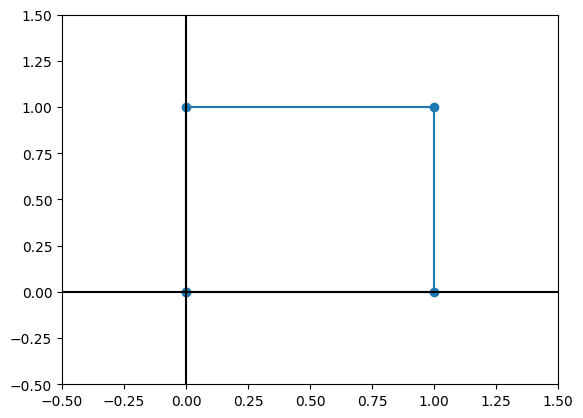

In [18]:
square = np.array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]], dtype=np.float32)
plt.plot(square[:, 0], square[:, 1])
plt.scatter(square[:, 0], square[:, 1])
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")

In [90]:
vt = VectorTransformation(translation_x=1, center_data=False, reflection=False)
new_square = vt.transform(square)
new_square

shear x: [[1 0 0]
 [0 1 0]
 [0 0 1]]
shear x: [[1 0 0]
 [0 1 0]
 [0 0 1]]
shear x: [[1 0 0]
 [0 1 0]
 [0 0 1]]
shear x: [[1 0 0]
 [0 1 0]
 [0 0 1]]
shear x: [[1 0 0]
 [0 1 0]
 [0 0 1]]


array([[1., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.]], dtype=float32)

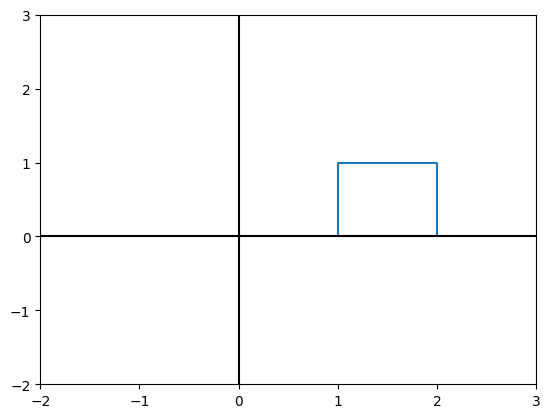

In [91]:
plt.plot(new_square[:, 0], new_square[:, 1])
plt.xlim([-2, 3])
plt.ylim([-2, 3])
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")


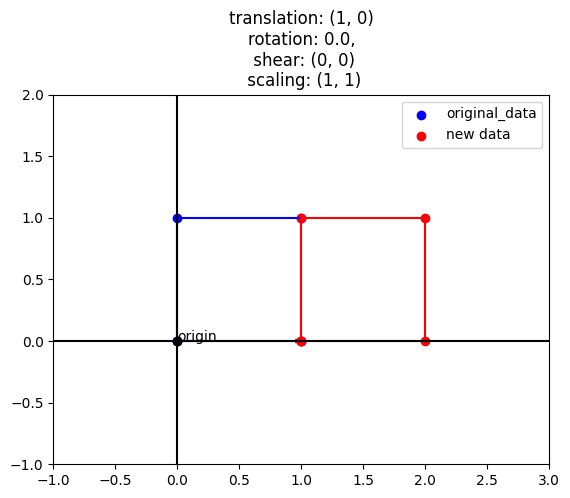

In [79]:
vt.visualize_change(square, new_square, plot=True)

In [114]:
vt.shx = 0.5
vt.shy = 1
vt.center = True
square3 = vt.transform(square[:-1])
square3

array([[ 0.25, -0.25,  1.  ],
       [ 1.25,  0.75,  1.  ],
       [ 1.75,  2.25,  1.  ],
       [ 0.75,  1.25,  1.  ]], dtype=float32)

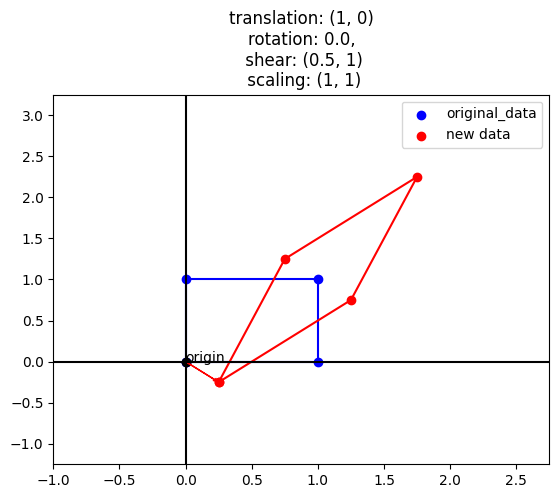

In [115]:
square3 = np.append(square3, [square3[0]]).reshape(square.shape)
vt.visualize_change(square, square3, plot=True)

In [128]:
vt2 = VectorTransformation(shear_x = 2, center_data=False, reflection=False)

r1 = np.array([[-1, 0, 1], [1, 0, 1], [1, 1, 1], [-1, 1, 1], [-1, 0, 1]], dtype=np.float32)

r2 = vt2.transform(r1[:-1], change_shear_direction=True)
r2 

array([[-1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 3.,  1.,  1.],
       [-3.,  1.,  1.]], dtype=float32)

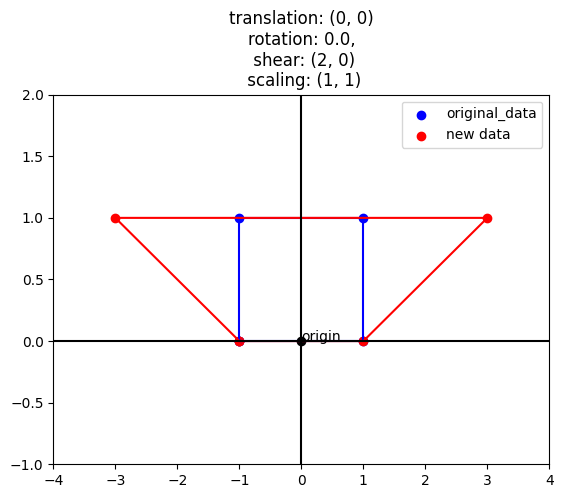

In [129]:
r2 = np.append(r2, [r2[0]]).reshape(r1.shape)
vt2.visualize_change(r1, r2, plot=True)